<a href="https://colab.research.google.com/github/JasonRen003/DIYA-Homelessness-Research-Code/blob/main/HomelessResearchProjectJasonRen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
!pip install scikit-learn
from sklearn.tree import DecisionTreeClassifier, plot_tree
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
!pip install dtreeviz
from dtreeviz.trees import *
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
data = files.upload()

Saving FeaturesDataset.csv to FeaturesDataset.csv


In [ ]:
featuresData = pd.read_csv("FeaturesDataset.csv", thousands=',')
featuresData.rename(columns={"cocnumber":"CoC Number"}, inplace = True)
featuresData.dropna(subset = ['econ_labor_unemp_pop_BLS'], inplace=True)
featuresData.dropna(subset = ['hou_pol_perm_bed_hic_hud'], inplace=True)
featuresData.dropna(subset = ['hou_pol_temp_bed_hic_hud'], inplace=True)
featuresData['homevalavg'] = featuresData[['hou_mkt_homeval_acs5yr_2017', 'hou_mkt_homeval_acs5yr_2012']].mean(axis=1)
featuresData['rentavg'] = featuresData[['hou_mkt_medrent_acs5yr_2017', 'hou_mkt_medrent_acs5yr_2012']].mean(axis=1)
featuresData['eduavg'] = featuresData[['dem_soc_ed_lesshs_acs5yr_2017', 'dem_soc_ed_lesshs_acs5yr_2012']].mean(axis=1)
featuresData['incavg'] = featuresData[['econ_labor_medinc_acs5yr_2017', 'econ_labor_medinc_acs5yr_2012']].mean(axis=1)
featuresData['hsgradavg'] = featuresData[['dem_soc_ed_hsgrad_acs5yr_2017', 'dem_soc_ed_hsgrad_acs5yr_2012']].mean(axis=1)
featuresData['logmentalhealth'] = np.log10(featuresData['dem_health_mhlth_chr_share_2017'])

In [ ]:
data1 = files.upload()

Saving CountOnly2010.csv to CountOnly2010.csv


In [ ]:
countOnly2010 = pd.read_csv("CountOnly2010.csv", thousands=',')
yearFil2010 = (featuresData['Year'] == 2010)
features2010 = featuresData[yearFil2010]
merged2010 = pd.merge(features2010, countOnly2010[['CoC Number','Unsheltered Homeless, 2010', 'Overall Homeless, 2010']],on = ['CoC Number'])
loc2010CA = ((merged2010['state_abr'] == 'CA') & (merged2010['Unsheltered Homeless, 2010'] < 10000) & (merged2010['hou_pol_perm_bed_hic_hud'] < 6000) & (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)) # only 1 data point with unsheltered pop over 10,000
merged2010CA = merged2010[loc2010CA]
#sns.scatterplot(data = merged2010CA, x = 'econ_labor_unemp_pop_BLS', y = 'Unsheltered Homeless, 2010') #This plot was used to find outliers and decide the outlier cutoff

In [ ]:
data2 = files.upload()

Saving CountOnly2011.csv to CountOnly2011.csv


In [ ]:
countOnly2011 = pd.read_csv("CountOnly2011.csv", thousands=',')
yearFil2011 = (featuresData['Year'] == 2011)
features2011 = featuresData[yearFil2011]
merged2011 = pd.merge(features2011, countOnly2011[['CoC Number','Unsheltered Homeless, 2011', 'Overall Homeless, 2011']],on = ['CoC Number'])
loc2011CA = ((merged2011['state_abr'] == 'CA') & (merged2011['Unsheltered Homeless, 2011'] < 10000) & (merged2011['hou_pol_perm_bed_hic_hud'] < 6000) & (merged2011['homevalavg'] < 800)& (merged2011['dem_health_mhlth_chr_share_2017'] < 3)) # only 1 data point with unsheltered pop over 10,000
merged2011CA = merged2011[loc2011CA]
#sns.scatterplot(data = merged2011CA, x = 'econ_labor_unemp_pop_BLS', y = 'Unsheltered Homeless, 2011') #This plot was used to find outliers and decide the outlier cutoff

In [ ]:
data3 = files.upload()

Saving CountOnly2012.csv to CountOnly2012.csv


In [ ]:
countOnly2012 = pd.read_csv("CountOnly2012.csv", thousands=',')
yearFil2012 = (featuresData['Year'] == 2012)
features2012 = featuresData[yearFil2012]
merged2012 = pd.merge(features2012, countOnly2012[['CoC Number','Unsheltered Homeless, 2012', 'Overall Homeless, 2012']],on = ['CoC Number'])
loc2012CA = ((merged2012['state_abr'] == 'CA') & (merged2012['Unsheltered Homeless, 2012'] < 10000) & (merged2012['hou_pol_perm_bed_hic_hud'] < 6000) & (merged2012['homevalavg'] < 800)& (merged2012['dem_health_mhlth_chr_share_2017'] < 3)) # only 1 data point with unsheltered pop over 10,000
merged2012CA = merged2012[loc2012CA]
#sns.scatterplot(data = merged2012CA, x = 'econ_labor_unemp_pop_BLS', y = 'Unsheltered Homeless, 2012') #This plot was used to find outliers and decide the outlier cutoff

In [ ]:
data4 = files.upload()

Saving CountOnly2013.csv to CountOnly2013.csv


In [ ]:
countOnly2013 = pd.read_csv("CountOnly2013.csv", thousands=',')
yearFil2013 = (featuresData['Year'] == 2013)
features2013 = featuresData[yearFil2013]
merged2013 = pd.merge(features2013, countOnly2013[['CoC Number','Unsheltered Homeless, 2013', 'Overall Homeless, 2013']],on = ['CoC Number'])
loc2013CA = ((merged2013['state_abr'] == 'CA') & (merged2013['Unsheltered Homeless, 2013'] < 10000) & (merged2013['hou_pol_perm_bed_hic_hud'] < 6000) & (merged2013['homevalavg'] < 800)& (merged2013['dem_health_mhlth_chr_share_2017'] < 3)) # only 1 data point with unsheltered pop over 10,000
merged2013CA = merged2013[loc2013CA]
#sns.scatterplot(data = merged2013CA, x = 'econ_labor_unemp_pop_BLS', y = 'Unsheltered Homeless, 2013') #This plot was used to find outliers and decide the outlier cutoff

In [ ]:
data5 = files.upload()

Saving CountOnly2014.csv to CountOnly2014.csv


In [ ]:
countOnly2014 = pd.read_csv("CountOnly2014.csv", thousands=',')
yearFil2014 = (featuresData['Year'] == 2014)
features2014 = featuresData[yearFil2014]
merged2014 = pd.merge(features2014, countOnly2014[['CoC Number','Unsheltered Homeless, 2014', 'Overall Homeless, 2014']],on = ['CoC Number'])
loc2014CA = ((merged2014['state_abr'] == 'CA')& (merged2014['Unsheltered Homeless, 2014'] < 10000) & (merged2014['hou_pol_perm_bed_hic_hud'] < 6000)  & (merged2014['homevalavg'] < 800)& (merged2014['dem_health_mhlth_chr_share_2017'] < 3)) # only 1 data point with unsheltered pop over 10,000
merged2014CA = merged2014[loc2014CA]
#sns.scatterplot(data = merged2014CA, x = 'econ_labor_unemp_pop_BLS', y = 'Unsheltered Homeless, 2014') #This plot was used to find outliers and decide the outlier cutoff

In [ ]:
data6 = files.upload()

Saving CountOnly2015.csv to CountOnly2015.csv


In [ ]:
countOnly2015 = pd.read_csv("CountOnly2015.csv", thousands=',')
yearFil2015 = (featuresData['Year'] == 2015)
features2015 = featuresData[yearFil2015]
merged2015 = pd.merge(features2015, countOnly2015[['CoC Number','Unsheltered Homeless, 2015', 'Overall Homeless, 2015']],on = ['CoC Number'])
loc2015CA = ((merged2015['state_abr'] == 'CA')& (merged2015['Unsheltered Homeless, 2015'] < 10000) & (merged2015['hou_pol_perm_bed_hic_hud'] < 6000) & (merged2015['homevalavg'] < 800)& (merged2015['dem_health_mhlth_chr_share_2017'] < 3))
merged2015CA = merged2015[loc2015CA]
#sns.scatterplot(data = merged2015CA, x = 'econ_labor_unemp_pop_BLS', y = 'Unsheltered Homeless, 2015') #This plot was used to find outliers and decide the outlier cutoff

In [ ]:
data7 = files.upload()

Saving CountOnly2016.csv to CountOnly2016.csv


In [ ]:
countOnly2016 = pd.read_csv("CountOnly2016.csv", thousands=',')
yearFil2016 = (featuresData['Year'] == 2016)
features2016 = featuresData[yearFil2016]
merged2016 = pd.merge(features2016, countOnly2016[['CoC Number','Unsheltered Homeless, 2016', 'Overall Homeless, 2016']],on = ['CoC Number'])
loc2016CA = ((merged2016['state_abr'] == 'CA')& (merged2016['Unsheltered Homeless, 2016'] < 10000) & (merged2016['hou_pol_perm_bed_hic_hud'] < 6000) & (merged2016['homevalavg'] < 800)& (merged2016['dem_health_mhlth_chr_share_2017'] < 3))
merged2016CA = merged2016[loc2016CA]
#sns.scatterplot(data = merged2016CA, x = 'econ_labor_unemp_pop_BLS', y = 'Unsheltered Homeless, 2016') #This plot was used to find outliers and decide the outlier cutoff

In [ ]:
data8 = files.upload()

Saving CountOnly2017.csv to CountOnly2017.csv


In [ ]:
countOnly2017 = pd.read_csv("CountOnly2017.csv", thousands=',')
yearFil2017 = (featuresData['Year'] == 2017)
features2017 = featuresData[yearFil2017]
merged2017 = pd.merge(features2017, countOnly2017[['CoC Number','Unsheltered Homeless, 2017', 'Overall Homeless, 2017']],on = ['CoC Number'])
loc2017CA = ((merged2017['state_abr'] == 'CA') & (merged2017['Unsheltered Homeless, 2017'] < 10000) & (merged2017['hou_pol_perm_bed_hic_hud'] < 6000) & (merged2017['homevalavg'] < 800)& (merged2017['dem_health_mhlth_chr_share_2017'] < 3)) #outlier filtering
merged2017CA = merged2017[loc2017CA]
#sns.scatterplot(data = merged2017CA, x = 'econ_labor_unemp_pop_BLS', y = 'Unsheltered Homeless, 2017') #This plot was used to find outliers and decide the outlier cutoff

In [ ]:
merged2010CA.rename(columns={"Unsheltered Homeless, 2010":"Unsheltered Homeless"}, inplace = True)
merged2010CA['year'] = '2010'
merged2011CA.rename(columns={"Unsheltered Homeless, 2011":"Unsheltered Homeless"}, inplace = True)
merged2011CA['year'] = '2011'
merged2012CA.rename(columns={"Unsheltered Homeless, 2012":"Unsheltered Homeless"}, inplace = True)
merged2012CA['year'] = '2012'
merged2013CA.rename(columns={"Unsheltered Homeless, 2013":"Unsheltered Homeless"}, inplace = True)
merged2013CA['year'] = '2013'
merged2014CA.rename(columns={"Unsheltered Homeless, 2014":"Unsheltered Homeless"}, inplace = True)
merged2014CA['year'] = '2014'
merged2015CA.rename(columns={"Unsheltered Homeless, 2015":"Unsheltered Homeless"}, inplace = True)
merged2015CA['year'] = '2015'
merged2016CA.rename(columns={"Unsheltered Homeless, 2016":"Unsheltered Homeless"}, inplace = True)
merged2016CA['year'] = '2016'
merged2017CA.rename(columns={"Unsheltered Homeless, 2017":"Unsheltered Homeless"}, inplace = True)
merged2017CA['year'] = '2017'

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [ ]:
necessaryOnly2010 = merged2010CA[['Unsheltered Homeless','logmentalhealth', 'econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census','year']]
necessaryOnly2011 = merged2011CA[['Unsheltered Homeless','logmentalhealth', 'econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census','year']]
necessaryOnly2012 = merged2012CA[['Unsheltered Homeless','logmentalhealth', 'econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census','year']]
necessaryOnly2013 = merged2013CA[['Unsheltered Homeless','logmentalhealth', 'econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census','year']]
necessaryOnly2014 = merged2014CA[['Unsheltered Homeless','logmentalhealth', 'econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census','year']]
necessaryOnly2015 = merged2015CA[['Unsheltered Homeless','logmentalhealth', 'econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census','year']]
necessaryOnly2016 = merged2016CA[['Unsheltered Homeless','logmentalhealth', 'econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census','year']]
necessaryOnly2017 = merged2017CA[['Unsheltered Homeless','logmentalhealth', 'econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census','year']]

In [ ]:
allYears = necessaryOnly2010.append([necessaryOnly2011,necessaryOnly2012,necessaryOnly2013,necessaryOnly2014,necessaryOnly2015,necessaryOnly2016,necessaryOnly2017])
print(allYears['Unsheltered Homeless'])

17    4983.0
19    1963.0
20    1194.0
21    2222.0
22    1872.0
       ...  
50    1638.0
51    1179.0
52     664.0
53    1026.0
54     822.0
Name: Unsheltered Homeless, Length: 263, dtype: float64


In [ ]:
X_5 = allYears[['logmentalhealth','econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census']]
y2 = allYears['Unsheltered Homeless']
X_train, X_valid, y_train, y_valid = train_test_split(X_5,y2,test_size = 0.3, random_state = 25)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid,y_valid,test_size = 0.33, random_state = 25)
D_tree = DecisionTreeRegressor(max_depth=3)
D_tree.fit(X_train, y_train)

D_tree.predict(X_valid)
score = D_tree.score(X_valid, y_valid)
print(score)
print(y2.size)

0.7980459864276617
263


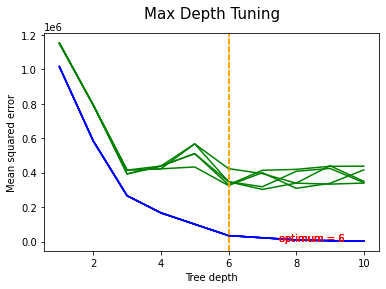

In [ ]:
#Tuning Max depth hyperparameter
for i in range(0,5):
  training_error  = []
  for i in range (1,11):
    model_1 = DecisionTreeRegressor(max_depth=i)
    model_1.fit(X_train, y_train)
    training_error.append(mse(y_train, model_1.predict(X_train)))

  testing_error = []
  for i in range (1,11):
      model_2 = DecisionTreeRegressor(max_depth=i)
      model_2.fit(X_train, y_train)
      testing_error.append(mse(y_valid, model_2.predict(X_valid)))

  plt.plot(range(1,11), training_error, color='blue', label='Training error')
  plt.plot(range(1,11), testing_error, color='green', label='Validation error')
  plt.xlabel('Tree depth')
  plt.axvline(x=6, color='orange', linestyle='--')
  plt.annotate('optimum = 6', xy=(7.5, 1.17), color='red')
  plt.ylabel('Mean squared error')
  plt.title('Max Depth Tuning', pad=15, size=15)
  plt.savefig('error.png')
  #plt.legend()

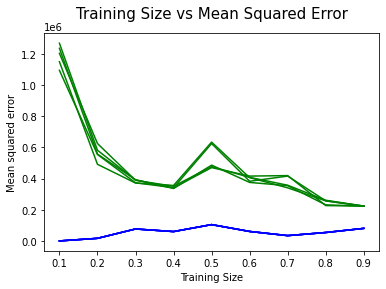

In [ ]:
for r in range(0,5):
  training_error  = []
  testing_error = []
  training_size = []
  for i in range (1,10):
    ts = (float(i)/10.0)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_5,y2,test_size = ts, random_state = 25)
    model_1 = DecisionTreeRegressor(max_depth=6)
    model_1.fit(X_train2, y_train2)
    training_error.append(mse(y_train2, model_1.predict(X_train2)))
    model_2 = DecisionTreeRegressor(max_depth=6)
    model_2.fit(X_train2, y_train2)
    testing_error.append(mse(y_test2, model_2.predict(X_test2)))
    training_size.append(1-ts)
  plt.plot(training_size, training_error, color='blue', label='Training error')
  plt.plot(training_size, testing_error, color='green', label='Testing error')
  plt.xlabel('Training Size')
  plt.ylabel('Mean squared error')
  plt.title('Training Size vs Mean Squared Error', pad=15, size=15)
  plt.savefig('error.png')

In [ ]:
gs = GridSearchCV(D_tree,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(2, 10, 2),
                                'min_samples_leaf': range(1, 10)},
                  cv=263,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(X_5, y2)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 8}
232433.9321023181


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


0.7895474992720964
314710.29083174287


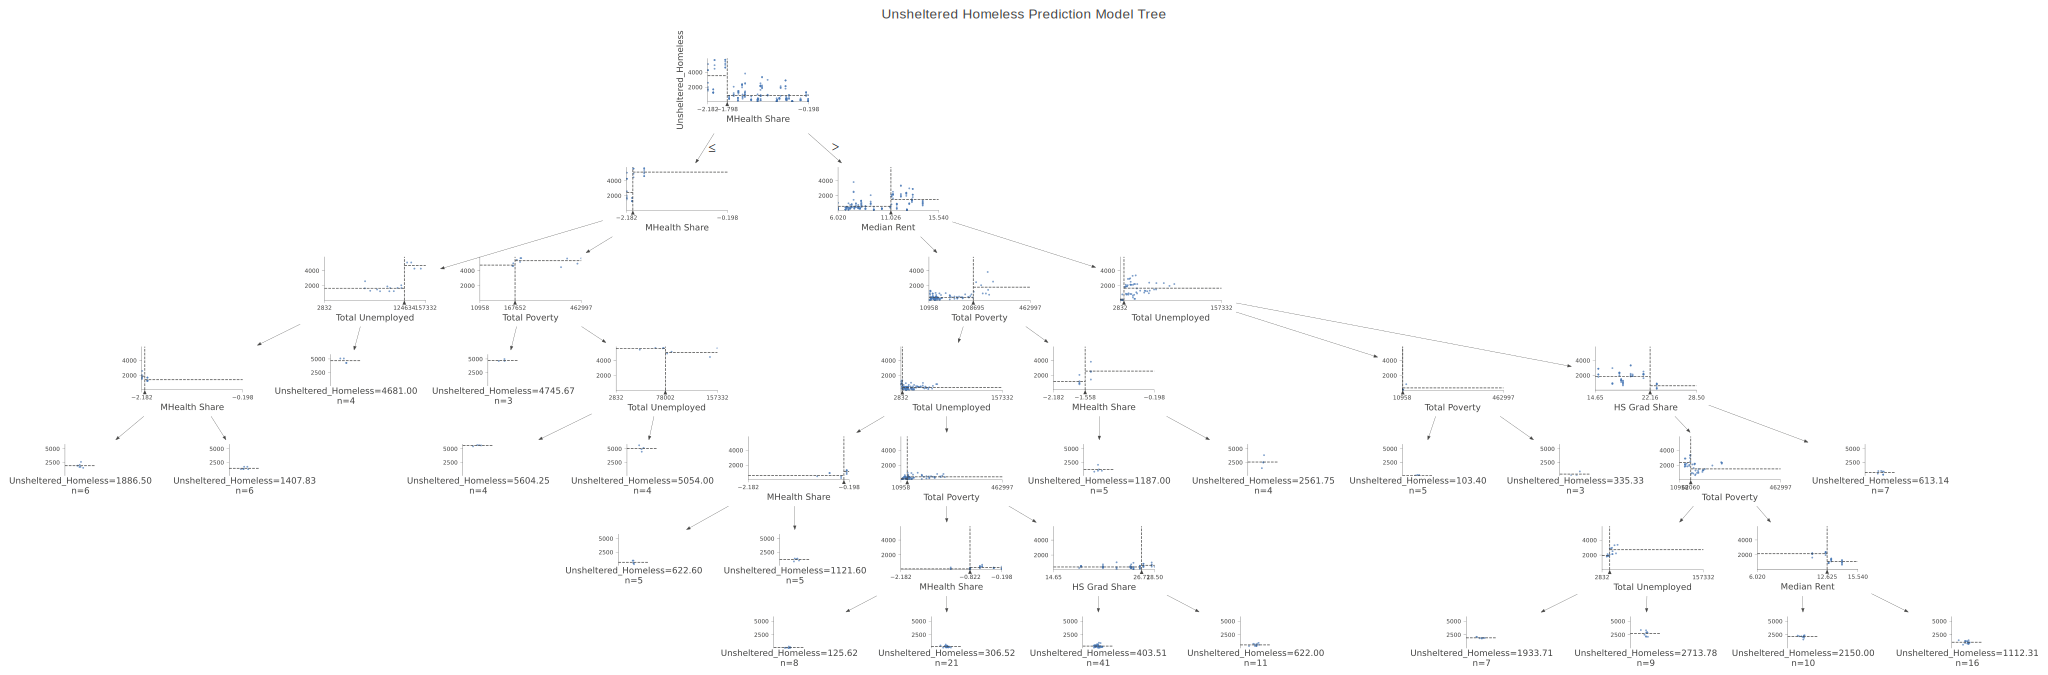

In [ ]:
X_5.rename(columns={"logmentalhealth":"MHealth Share","econ_labor_unemp_pop_BLS":"Total Unemployed","hsgradavg":"HS Grad Share","rentavg":"Median Rent","econ_labor_pov_pop_census":"Total Poverty"}, inplace = True)
dOpt = DecisionTreeRegressor(max_depth=6, min_samples_leaf = 3, min_samples_split=8)
dOpt.fit(X_train,y_train)
score = dOpt.score(X_test, y_test)
print(score)
error = metrics.mean_squared_error(y_test,dOpt.predict(X_test))
print(error)
viz = dtreeviz(dOpt,
               x_data=X_train,
               y_data=y_train,
               target_name='Unsheltered_Homeless',
               feature_names=X_5.columns,
               title = "Unsheltered Homeless Prediction Model Tree")
viz

In [ ]:
r = permutation_importance(dOpt, X_valid, y_valid,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
  print(f"{X_5.columns[i]:<8}" + " " +
        f"{r.importances_mean[i]:.3f}"
        f" +/- {r.importances_std[i]:.3f}")

MHealth Share 1.066 +/- 0.196
Total Poverty 0.359 +/- 0.067
Total Unemployed 0.319 +/- 0.071
Median Rent 0.172 +/- 0.068
HS Grad Share 0.113 +/- 0.049


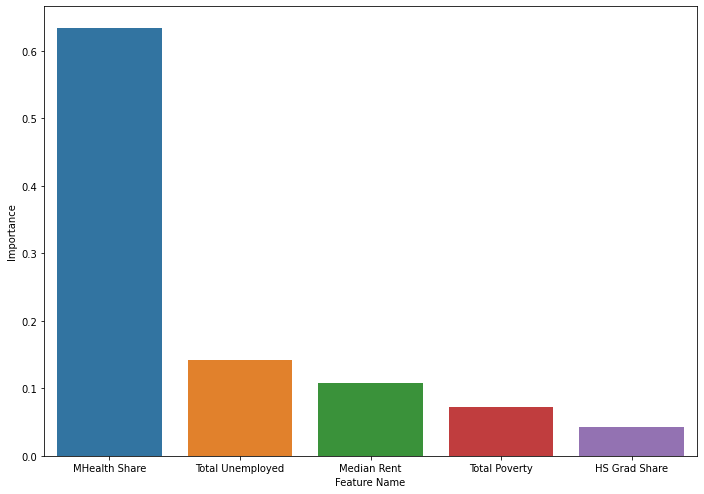

In [ ]:
impDF = pd.DataFrame({'Feature Name':X_5.columns,'Importance':dOpt.feature_importances_})
impDF.sort_values(by = 'Importance', ascending = False, inplace=True)
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(ax = ax, x = impDF['Feature Name'], y = impDF['Importance'])

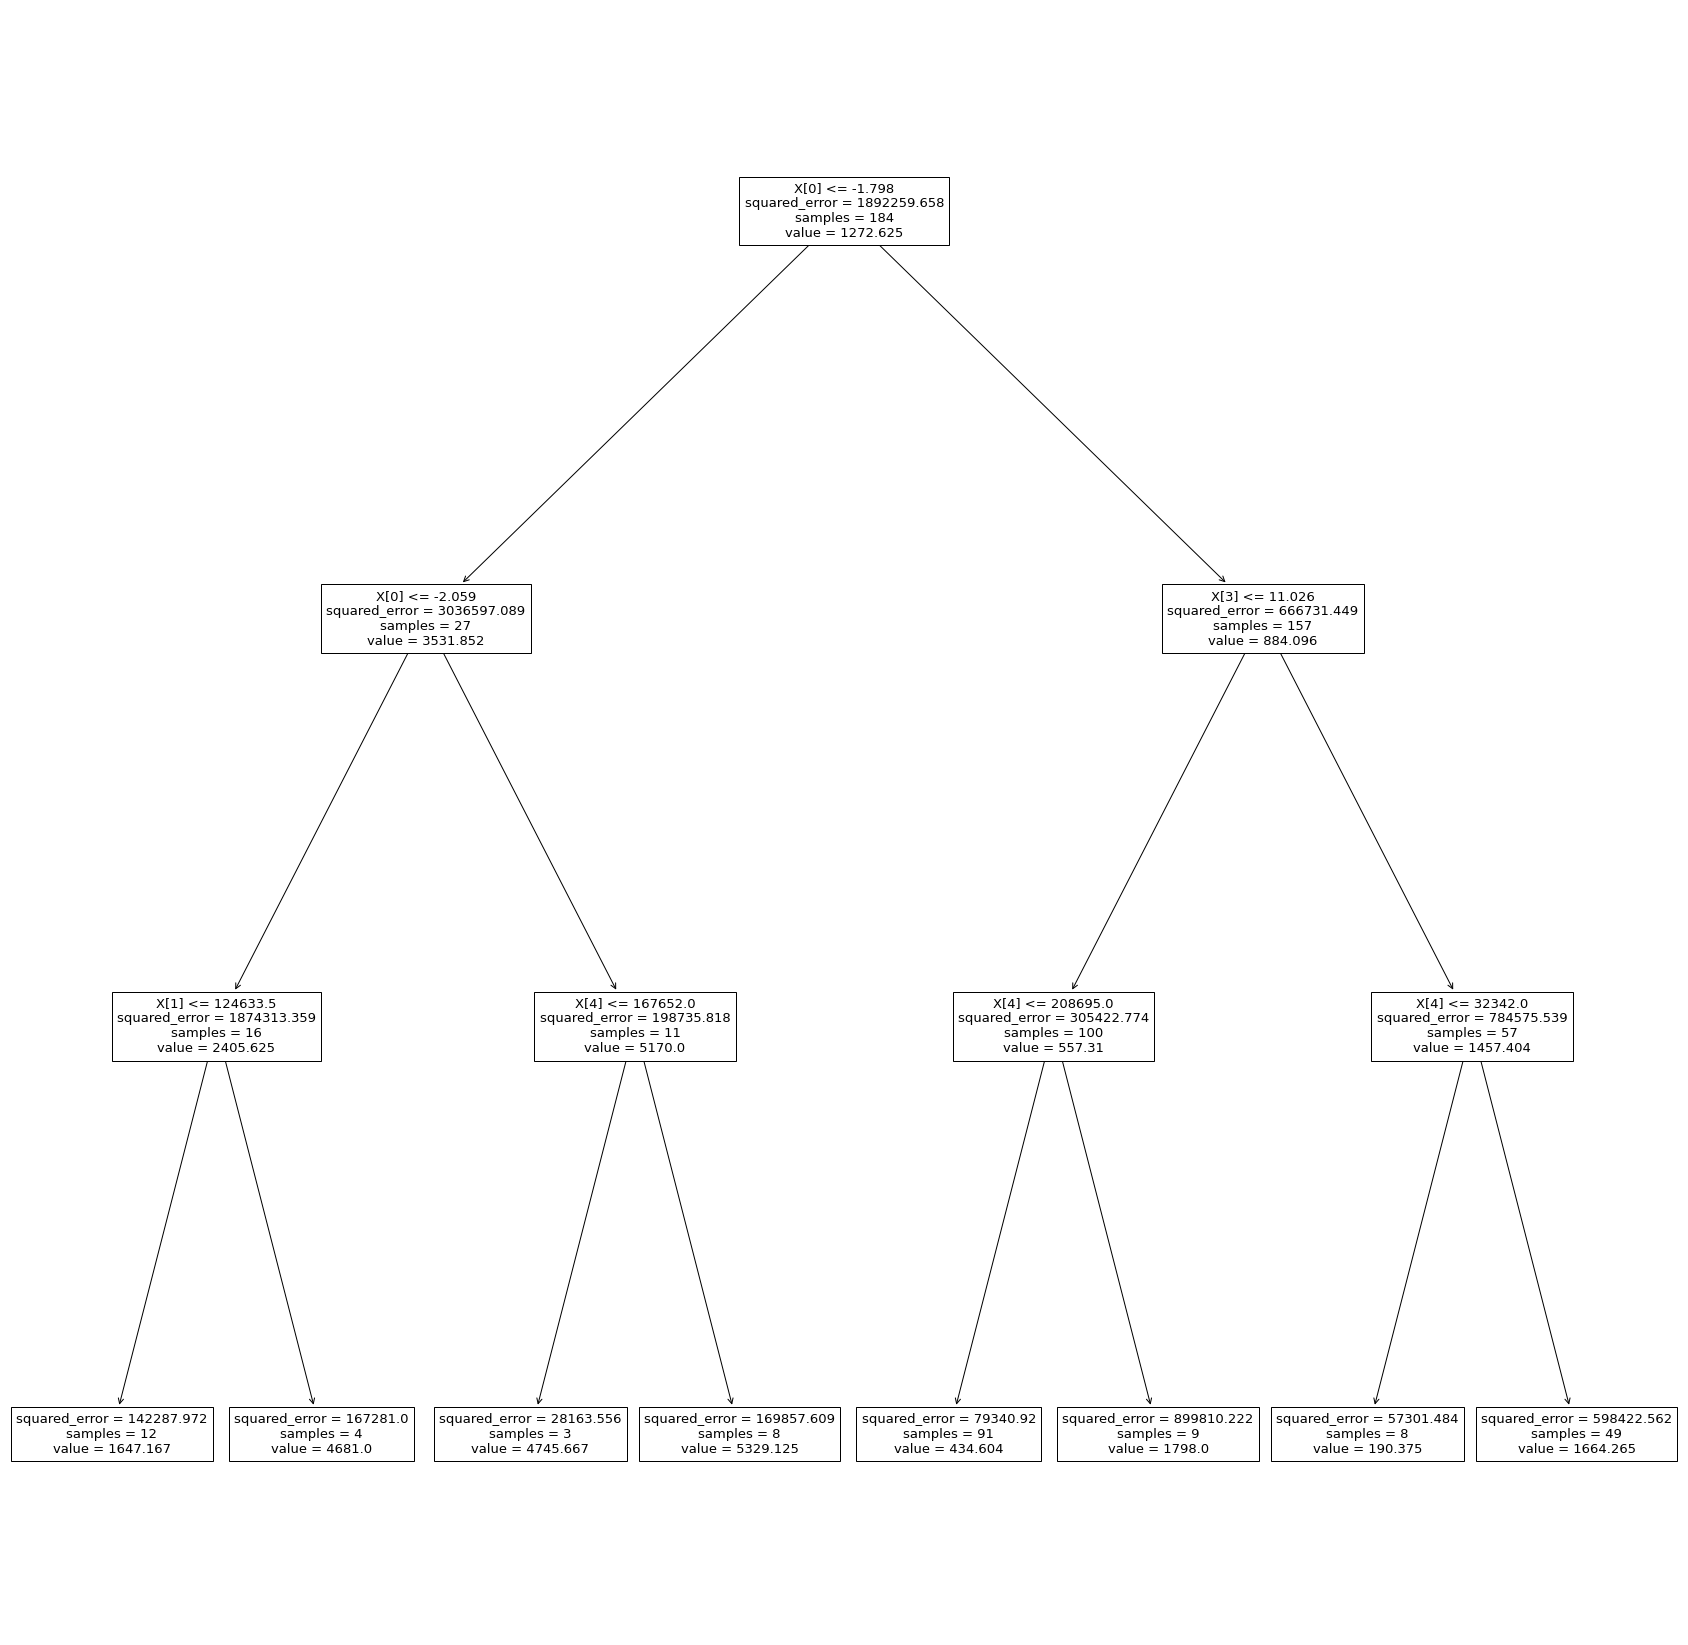

In [ ]:
plt.figure(figsize=(30, 30))
plot_tree(D_tree)
plt.show()


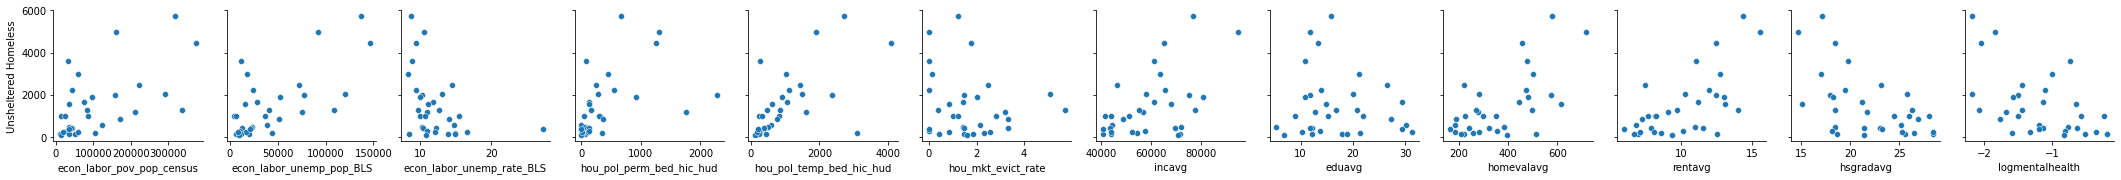

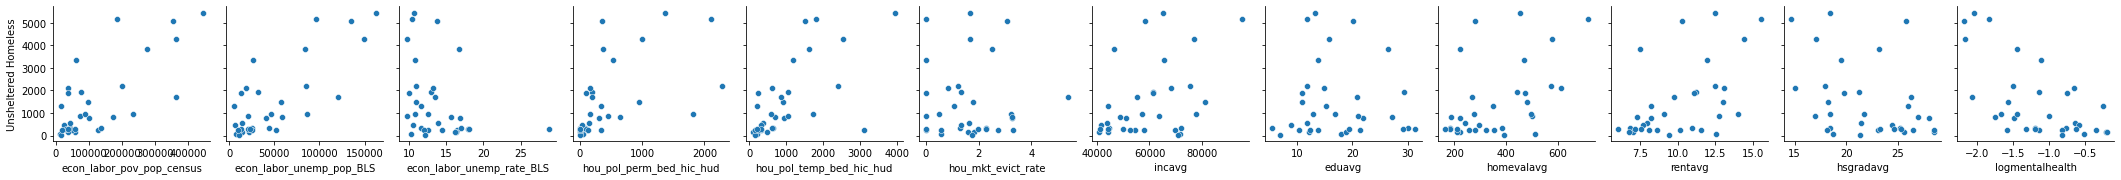

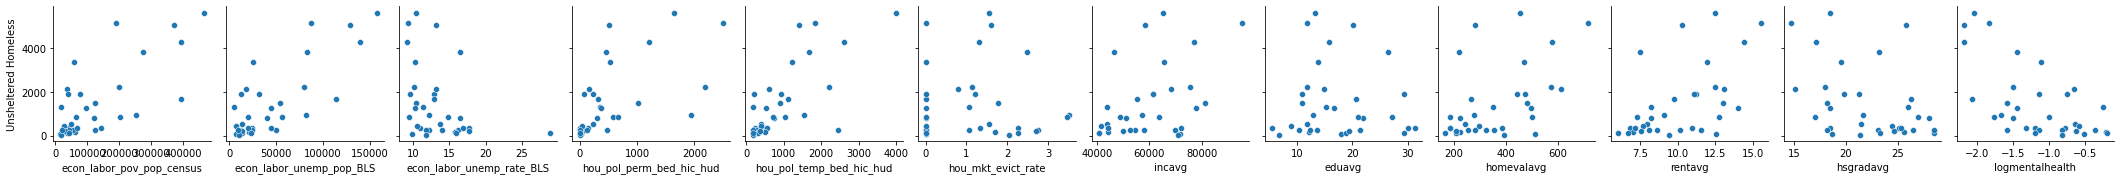

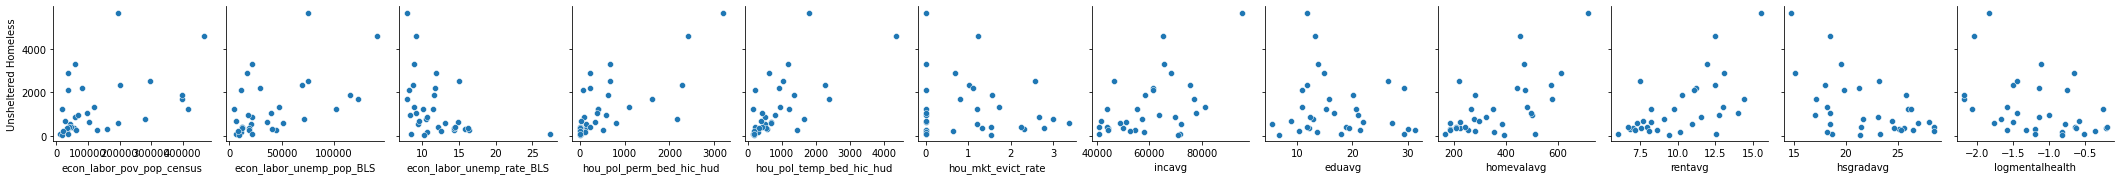

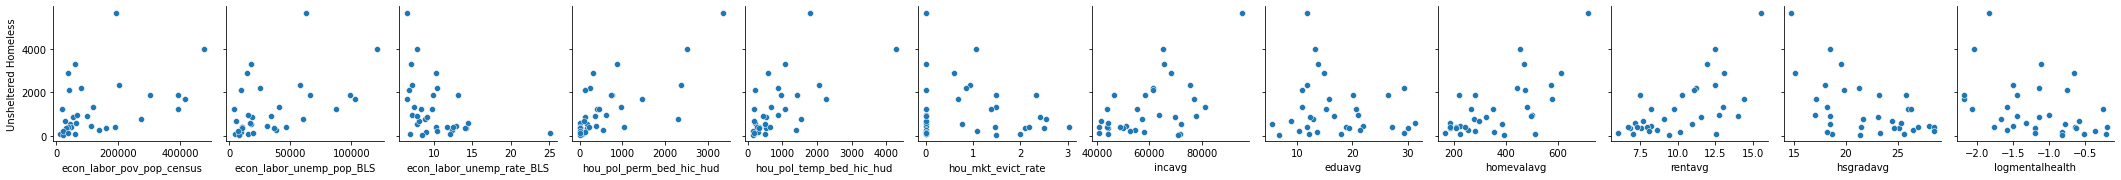

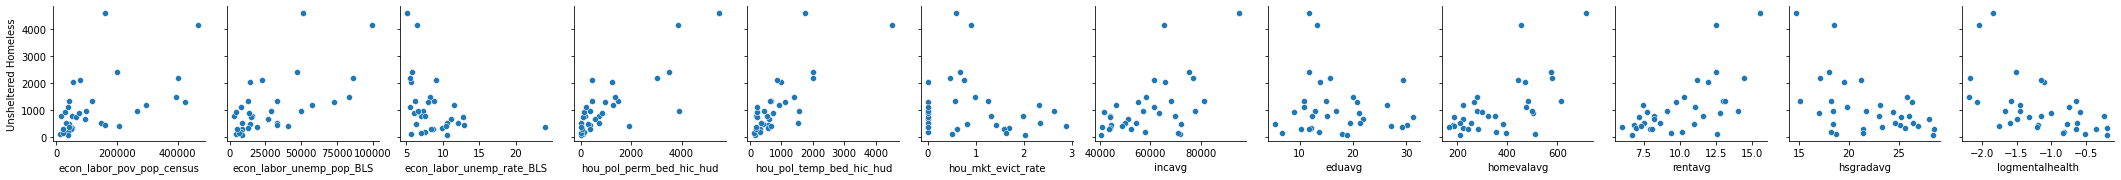

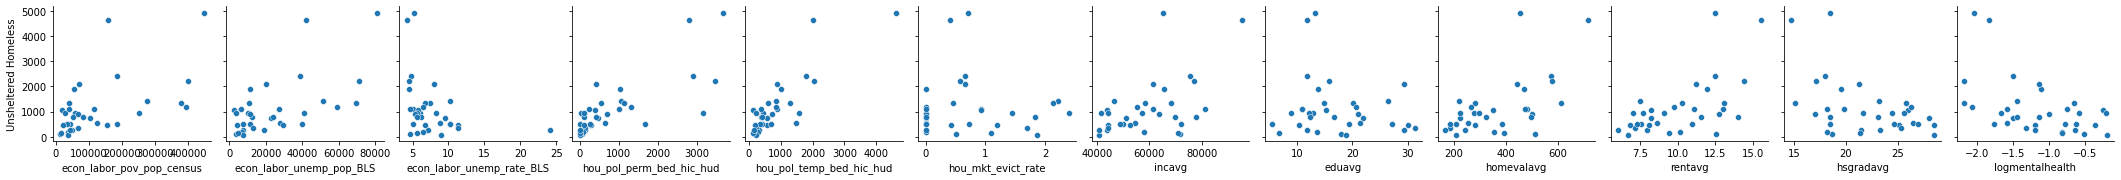

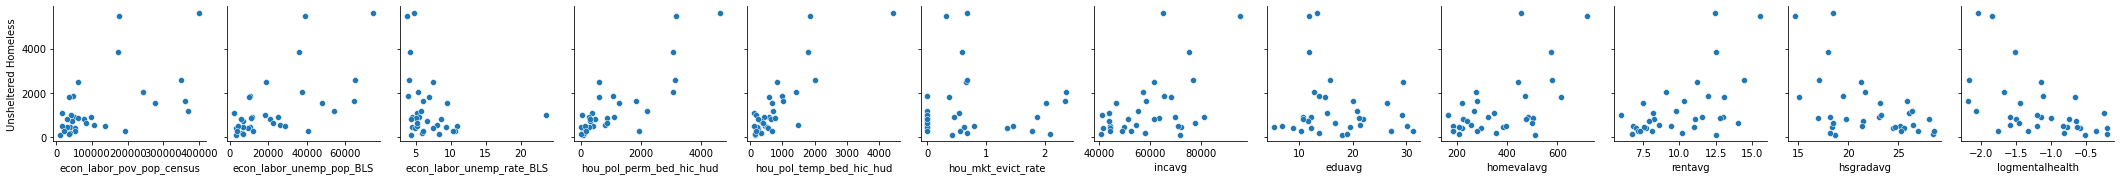

In [ ]:
CA2010plots = sns.pairplot(data = merged2010CA, y_vars = ['Unsheltered Homeless'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
CA2011plots = sns.pairplot(data = merged2011CA, y_vars = ['Unsheltered Homeless'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
CA2012plots = sns.pairplot(data = merged2012CA, y_vars = ['Unsheltered Homeless'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
CA2013plots = sns.pairplot(data = merged2013CA, y_vars = ['Unsheltered Homeless'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
CA2014plots = sns.pairplot(data = merged2014CA, y_vars = ['Unsheltered Homeless'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
CA2015plots = sns.pairplot(data = merged2015CA, y_vars = ['Unsheltered Homeless'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
CA2016plots = sns.pairplot(data = merged2016CA, y_vars = ['Unsheltered Homeless'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
CA2017plots = sns.pairplot(data = merged2017CA, y_vars = ['Unsheltered Homeless'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 

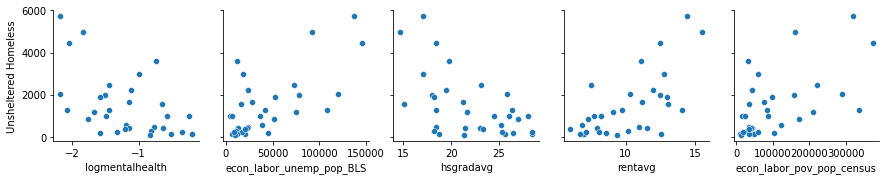

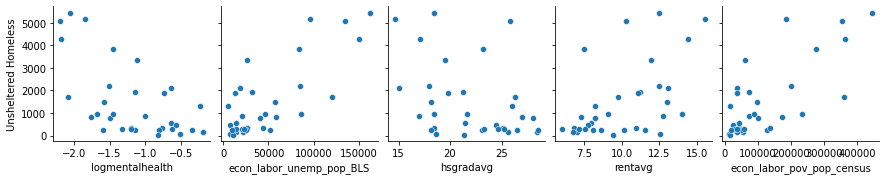

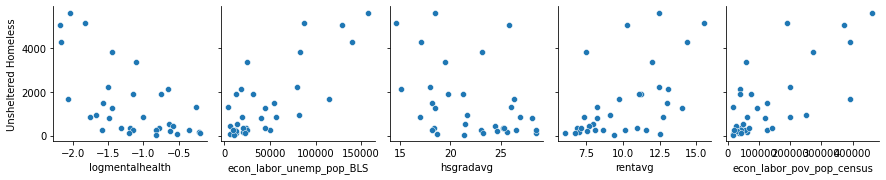

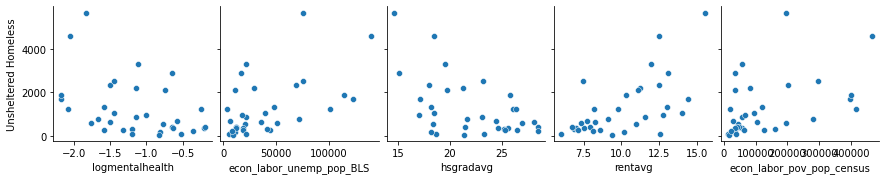

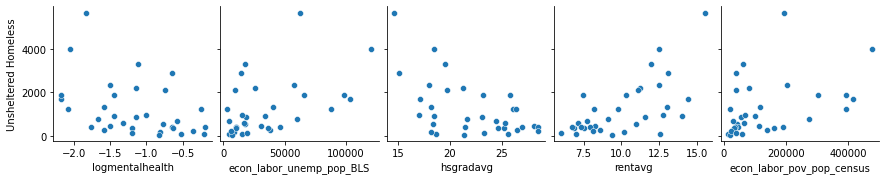

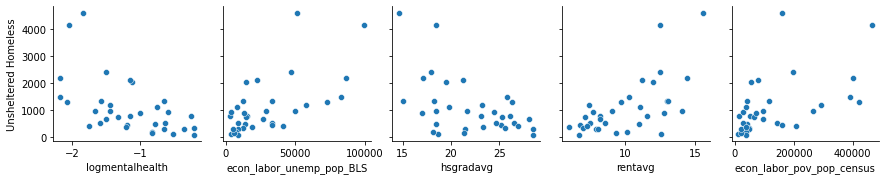

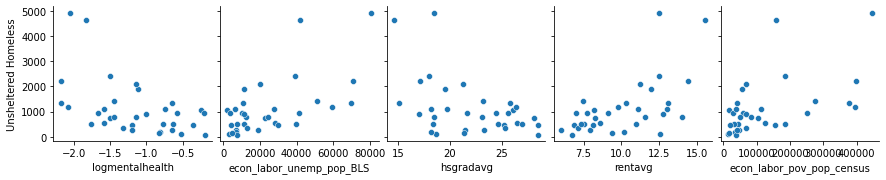

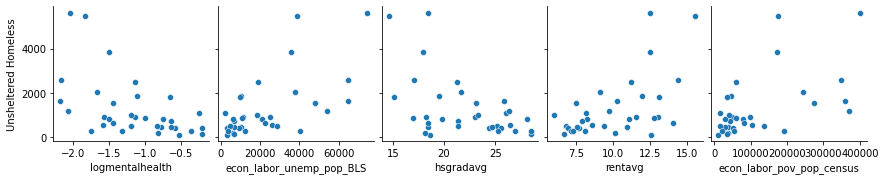

In [ ]:
CA2010plots = sns.pairplot(data = merged2010CA, y_vars = ['Unsheltered Homeless'], x_vars = ['logmentalhealth','econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census']) 
CA2011plots = sns.pairplot(data = merged2011CA, y_vars = ['Unsheltered Homeless'], x_vars = ['logmentalhealth','econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census']) 
CA2012plots = sns.pairplot(data = merged2012CA, y_vars = ['Unsheltered Homeless'], x_vars = ['logmentalhealth','econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census']) 
CA2013plots = sns.pairplot(data = merged2013CA, y_vars = ['Unsheltered Homeless'], x_vars = ['logmentalhealth','econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census']) 
CA2014plots = sns.pairplot(data = merged2014CA, y_vars = ['Unsheltered Homeless'], x_vars = ['logmentalhealth','econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census']) 
CA2015plots = sns.pairplot(data = merged2015CA, y_vars = ['Unsheltered Homeless'], x_vars = ['logmentalhealth','econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census']) 
CA2016plots = sns.pairplot(data = merged2016CA, y_vars = ['Unsheltered Homeless'], x_vars = ['logmentalhealth','econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census']) 
CA2017plots = sns.pairplot(data = merged2017CA, y_vars = ['Unsheltered Homeless'], x_vars = ['logmentalhealth','econ_labor_unemp_pop_BLS','hsgradavg','rentavg','econ_labor_pov_pop_census']) 

In [ ]:
slope, intercept, unempr2010, p, se = stats.linregress(merged2010CA['econ_labor_unemp_pop_BLS'], merged2010CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, unempr2011, p, se = stats.linregress(merged2011CA['econ_labor_unemp_pop_BLS'], merged2011CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, unempr2012, p, se = stats.linregress(merged2012CA['econ_labor_unemp_pop_BLS'], merged2012CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, unempr2013, p, se = stats.linregress(merged2013CA['econ_labor_unemp_pop_BLS'], merged2013CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, unempr2014, p, se = stats.linregress(merged2014CA['econ_labor_unemp_pop_BLS'], merged2014CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, unempr2015, p, se = stats.linregress(merged2015CA['econ_labor_unemp_pop_BLS'], merged2015CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, unempr2016, p, se = stats.linregress(merged2016CA['econ_labor_unemp_pop_BLS'], merged2016CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, unempr2017, p, se = stats.linregress(merged2017CA['econ_labor_unemp_pop_BLS'], merged2017CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the unemployed pop from 2010-2017 is: " + str((unempr2010 + unempr2011 + unempr2012 + unempr2013 + unempr2014 + unempr2015 + unempr2016 + unempr2017) / 8))


slope, intercept, permbedr2010, p, se = stats.linregress(merged2010CA['hou_pol_perm_bed_hic_hud'], merged2010CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, permbedr2011, p, se = stats.linregress(merged2011CA['hou_pol_perm_bed_hic_hud'], merged2011CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, permbedr2012, p, se = stats.linregress(merged2012CA['hou_pol_perm_bed_hic_hud'], merged2012CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, permbedr2013, p, se = stats.linregress(merged2013CA['hou_pol_perm_bed_hic_hud'], merged2013CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, permbedr2014, p, se = stats.linregress(merged2014CA['hou_pol_perm_bed_hic_hud'], merged2014CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, permbedr2015, p, se = stats.linregress(merged2015CA['hou_pol_perm_bed_hic_hud'], merged2015CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, permbedr2016, p, se = stats.linregress(merged2016CA['hou_pol_perm_bed_hic_hud'], merged2016CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, permbedr2017, p, se = stats.linregress(merged2017CA['hou_pol_perm_bed_hic_hud'], merged2017CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the permanent shelter beds from 2010-2017 is: " + str((permbedr2010 + permbedr2011 + permbedr2012 + permbedr2013 + permbedr2014 + permbedr2015 + permbedr2016 + permbedr2017) / 8))

slope, intercept, tempbedr2010, p, se = stats.linregress(merged2010CA['hou_pol_temp_bed_hic_hud'], merged2010CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, tempbedr2011, p, se = stats.linregress(merged2011CA['hou_pol_temp_bed_hic_hud'], merged2011CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, tempbedr2012, p, se = stats.linregress(merged2012CA['hou_pol_temp_bed_hic_hud'], merged2012CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, tempbedr2013, p, se = stats.linregress(merged2013CA['hou_pol_temp_bed_hic_hud'], merged2013CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, tempbedr2014, p, se = stats.linregress(merged2014CA['hou_pol_temp_bed_hic_hud'], merged2014CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, tempbedr2015, p, se = stats.linregress(merged2015CA['hou_pol_temp_bed_hic_hud'], merged2015CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, tempbedr2016, p, se = stats.linregress(merged2016CA['hou_pol_temp_bed_hic_hud'], merged2016CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, tempbedr2017, p, se = stats.linregress(merged2017CA['hou_pol_temp_bed_hic_hud'], merged2017CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the temporary shelter beds from 2010-2017 is: " + str((tempbedr2010 + tempbedr2011 + tempbedr2012 + tempbedr2013 + tempbedr2014 + tempbedr2015 + tempbedr2016 + tempbedr2017) / 8))

slope, intercept, incr2010, p, se = stats.linregress(merged2010CA['incavg'], merged2010CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, incr2011, p, se = stats.linregress(merged2011CA['incavg'], merged2011CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, incr2012, p, se = stats.linregress(merged2012CA['incavg'], merged2012CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, incr2013, p, se = stats.linregress(merged2013CA['incavg'], merged2013CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, incr2014, p, se = stats.linregress(merged2014CA['incavg'], merged2014CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, incr2015, p, se = stats.linregress(merged2015CA['incavg'], merged2015CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, incr2016, p, se = stats.linregress(merged2016CA['incavg'], merged2016CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, incr2017, p, se = stats.linregress(merged2017CA['incavg'], merged2017CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the income from 2010-2017 is: " + str((incr2010 + incr2011 + incr2012 + incr2013 + incr2014 + incr2015 + incr2016 + incr2017) / 8))


slope, intercept, valr2010, p, se = stats.linregress(merged2010CA['homevalavg'], merged2010CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, valr2011, p, se = stats.linregress(merged2011CA['homevalavg'], merged2011CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, valr2012, p, se = stats.linregress(merged2012CA['homevalavg'], merged2012CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, valr2013, p, se = stats.linregress(merged2013CA['homevalavg'], merged2013CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, valr2014, p, se = stats.linregress(merged2014CA['homevalavg'], merged2014CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, valr2015, p, se = stats.linregress(merged2015CA['homevalavg'], merged2015CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, valr2016, p, se = stats.linregress(merged2016CA['homevalavg'], merged2016CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, valr2017, p, se = stats.linregress(merged2017CA['homevalavg'], merged2017CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the house values 2010-2017 is: " + str((valr2010 + valr2011 + valr2012 + valr2013 + valr2014 + valr2015 + valr2016 + valr2017) / 8))

slope, intercept, rentr2010, p, se = stats.linregress(merged2010CA['rentavg'], merged2010CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, rentr2011, p, se = stats.linregress(merged2011CA['rentavg'], merged2011CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, rentr2012, p, se = stats.linregress(merged2012CA['rentavg'], merged2012CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, rentr2013, p, se = stats.linregress(merged2013CA['rentavg'], merged2013CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, rentr2014, p, se = stats.linregress(merged2014CA['rentavg'], merged2014CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, rentr2015, p, se = stats.linregress(merged2015CA['rentavg'], merged2015CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, rentr2016, p, se = stats.linregress(merged2016CA['rentavg'], merged2016CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, rentr2017, p, se = stats.linregress(merged2017CA['rentavg'], merged2017CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the rent costs 2010-2017 is: " + str((rentr2010 + rentr2011 + rentr2012 + rentr2013 + rentr2014 + rentr2015 + rentr2016 + rentr2017) / 8))

slope, intercept, hsgradr2010, p, se = stats.linregress(merged2010CA['hsgradavg'], merged2010CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, hsgradr2011, p, se = stats.linregress(merged2011CA['hsgradavg'], merged2011CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, hsgradr2012, p, se = stats.linregress(merged2012CA['hsgradavg'], merged2012CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, hsgradr2013, p, se = stats.linregress(merged2013CA['hsgradavg'], merged2013CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, hsgradr2014, p, se = stats.linregress(merged2014CA['hsgradavg'], merged2014CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, hsgradr2015, p, se = stats.linregress(merged2015CA['hsgradavg'], merged2015CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, hsgradr2016, p, se = stats.linregress(merged2016CA['hsgradavg'], merged2016CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, hsgradr2017, p, se = stats.linregress(merged2017CA['hsgradavg'], merged2017CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the high school graduate population costs 2010-2017 is: " + str((hsgradr2010 + hsgradr2011 + hsgradr2012 + hsgradr2013 + hsgradr2014 + hsgradr2015 + hsgradr2016 + hsgradr2017) / 8))

slope, intercept, mentalr2010, p, se = stats.linregress(merged2010CA['logmentalhealth'], merged2010CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, mentalr2011, p, se = stats.linregress(merged2011CA['logmentalhealth'], merged2011CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, mentalr2012, p, se = stats.linregress(merged2012CA['logmentalhealth'], merged2012CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, mentalr2013, p, se = stats.linregress(merged2013CA['logmentalhealth'], merged2013CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, mentalr2014, p, se = stats.linregress(merged2014CA['logmentalhealth'], merged2014CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, mentalr2015, p, se = stats.linregress(merged2015CA['logmentalhealth'], merged2015CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, mentalr2016, p, se = stats.linregress(merged2016CA['logmentalhealth'], merged2016CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, mentalr2017, p, se = stats.linregress(merged2017CA['logmentalhealth'], merged2017CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the log of mental health providers from 2010-2017 is: " + str((mentalr2010 + mentalr2011 + mentalr2012 + mentalr2013 + mentalr2014 + mentalr2015 + mentalr2016 + mentalr2017) / 8))

slope, intercept, povr2010, p, se = stats.linregress(merged2010CA['econ_labor_pov_pop_census'], merged2010CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, povr2011, p, se = stats.linregress(merged2011CA['econ_labor_pov_pop_census'], merged2011CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, povr2012, p, se = stats.linregress(merged2012CA['econ_labor_pov_pop_census'], merged2012CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, povr2013, p, se = stats.linregress(merged2013CA['econ_labor_pov_pop_census'], merged2013CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, povr2014, p, se = stats.linregress(merged2014CA['econ_labor_pov_pop_census'], merged2014CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, povr2015, p, se = stats.linregress(merged2015CA['econ_labor_pov_pop_census'], merged2015CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, povr2016, p, se = stats.linregress(merged2016CA['econ_labor_pov_pop_census'], merged2016CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, povr2017, p, se = stats.linregress(merged2017CA['econ_labor_pov_pop_census'], merged2017CA['Unsheltered Homeless'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the population in poverty from 2010-2017 is: " + str((povr2010 + povr2011 + povr2012 + povr2013 + povr2014 + povr2015 + povr2016 + povr2017) / 8))

Average r-value of the unemployed pop from 2010-2017 is: 0.6378892290356248
Average r-value of the permanent shelter beds from 2010-2017 is: 0.6876795130661084
Average r-value of the temporary shelter beds from 2010-2017 is: 0.7241411218871413
Average r-value of the income from 2010-2017 is: 0.5088896891245887
Average r-value of the house values 2010-2017 is: 0.5917176073781053
Average r-value of the rent costs 2010-2017 is: 0.5930696242177975
Average r-value of the high school graduate population costs 2010-2017 is: -0.48623699955835153
Average r-value of the log of mental health providers from 2010-2017 is: -0.5264703213681599
Average r-value of the population in poverty from 2010-2017 is: 0.5705873685769782


In [ ]:
loc2010NY = ((merged2010['state_abr'] == 'NY')& (merged2010['Unsheltered Homeless, 2010'] < 2000) & (merged2010['econ_labor_unemp_pop_BLS'] < 75000)) #  & (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2010NY = merged2010[loc2010NY]

loc2011NY = ((merged2011['state_abr'] == 'NY')& (merged2011['Unsheltered Homeless, 2011'] < 2000) & (merged2011['econ_labor_unemp_pop_BLS'] < 75000)) #& (merged2010['Unsheltered Homeless, 2010'] < 2000) & (merged2010['hou_pol_perm_bed_hic_hud'] < 6000) & (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2011NY = merged2011[loc2011NY]

loc2012NY = ((merged2012['state_abr'] == 'NY')& (merged2012['Unsheltered Homeless, 2012'] < 2000) & (merged2012['econ_labor_unemp_pop_BLS'] < 75000)) #& (merged2010['Unsheltered Homeless, 2010'] < 2000) & (merged2010['hou_pol_perm_bed_hic_hud'] < 6000) & (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2012NY = merged2012[loc2012NY]

loc2013NY = ((merged2013['state_abr'] == 'NY')& (merged2013['Unsheltered Homeless, 2013'] < 2000) & (merged2013['econ_labor_unemp_pop_BLS'] < 75000)) #& (merged2010['Unsheltered Homeless, 2010'] < 2000) & (merged2010['hou_pol_perm_bed_hic_hud'] < 6000) & (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2013NY = merged2013[loc2013NY]

loc2014NY = ((merged2014['state_abr'] == 'NY')& (merged2014['Unsheltered Homeless, 2014'] < 2000) & (merged2014['econ_labor_unemp_pop_BLS'] < 75000)) #& (merged2010['Unsheltered Homeless, 2010'] < 2000) & (merged2010['hou_pol_perm_bed_hic_hud'] < 6000) & (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2014NY = merged2014[loc2014NY]

loc2015NY = ((merged2015['state_abr'] == 'NY')& (merged2015['Unsheltered Homeless, 2015'] < 2000) & (merged2015['econ_labor_unemp_pop_BLS'] < 75000)) #& (merged2010['Unsheltered Homeless, 2010'] < 2000) & (merged2010['hou_pol_perm_bed_hic_hud'] < 6000) & (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2015NY = merged2015[loc2015NY]

loc2016NY = ((merged2016['state_abr'] == 'NY')& (merged2016['Unsheltered Homeless, 2016'] < 2000) & (merged2016['econ_labor_unemp_pop_BLS'] < 75000)) #& (merged2010['Unsheltered Homeless, 2010'] < 2000) & (merged2010['hou_pol_perm_bed_hic_hud'] < 6000) & (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2016NY = merged2016[loc2016NY]

loc2017NY = ((merged2017['state_abr'] == 'NY')& (merged2017['Unsheltered Homeless, 2017'] < 2000) & (merged2017['econ_labor_unemp_pop_BLS'] < 75000)) #& (merged2010['Unsheltered Homeless, 2010'] < 2000) & (merged2010['hou_pol_perm_bed_hic_hud'] < 6000) & (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2017NY = merged2017[loc2017NY]

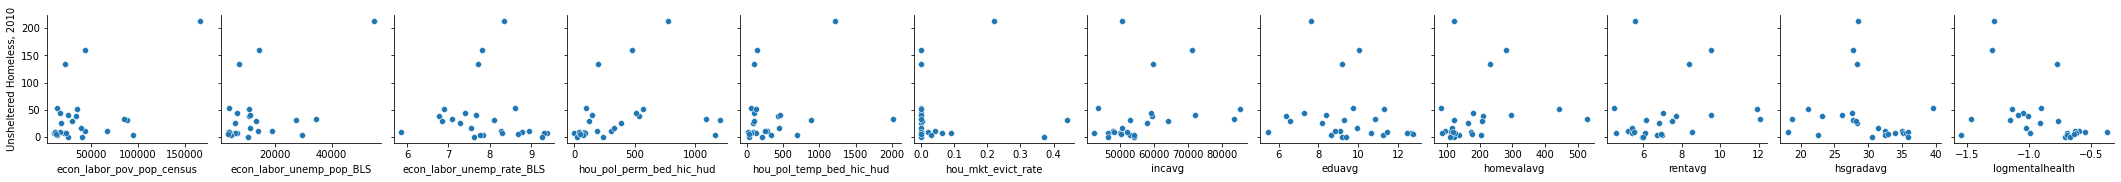

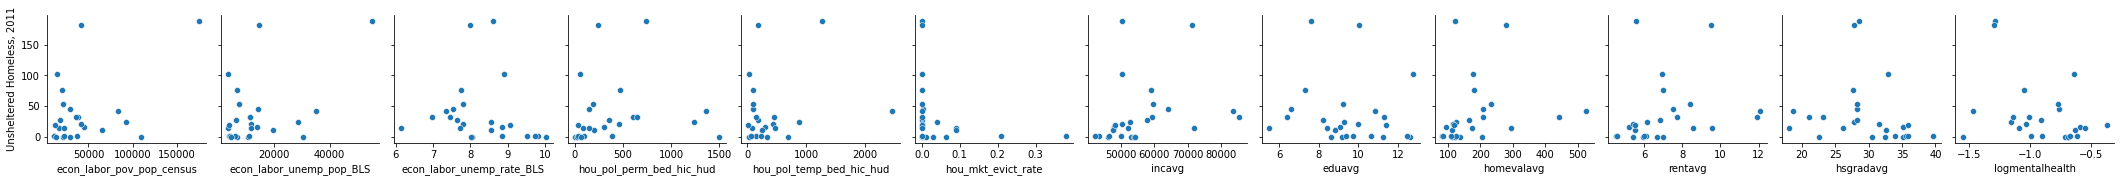

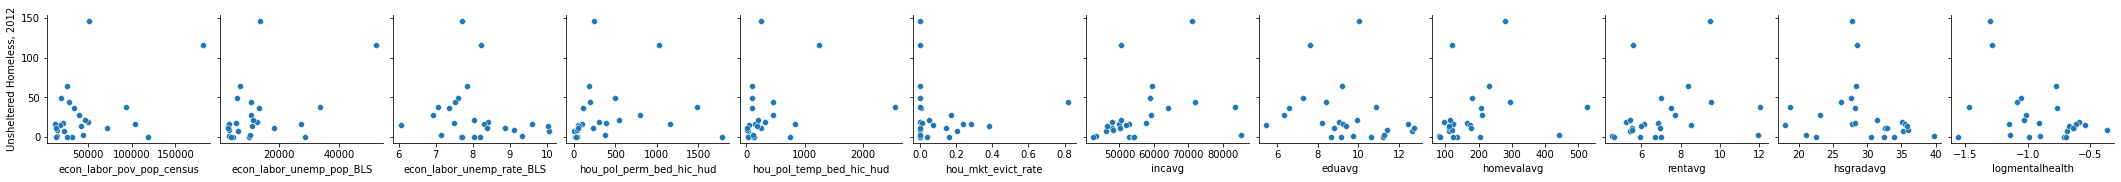

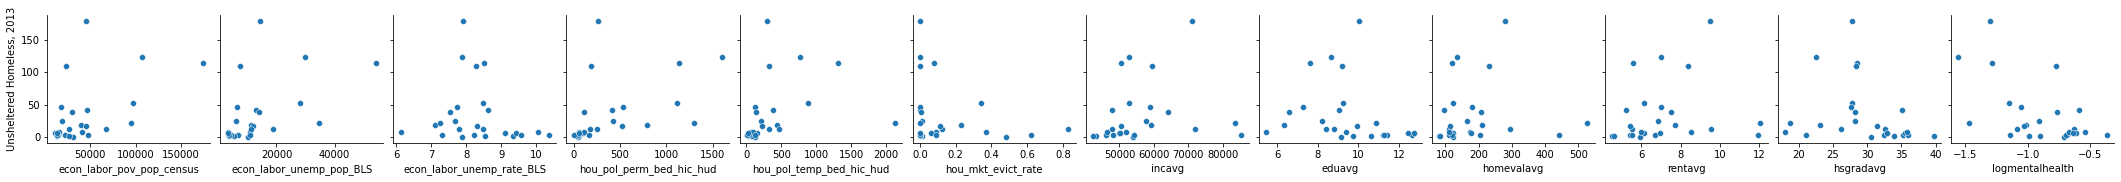

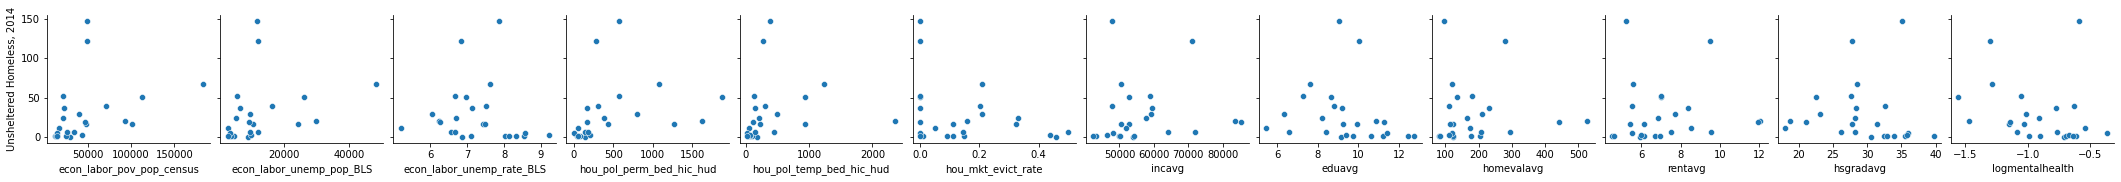

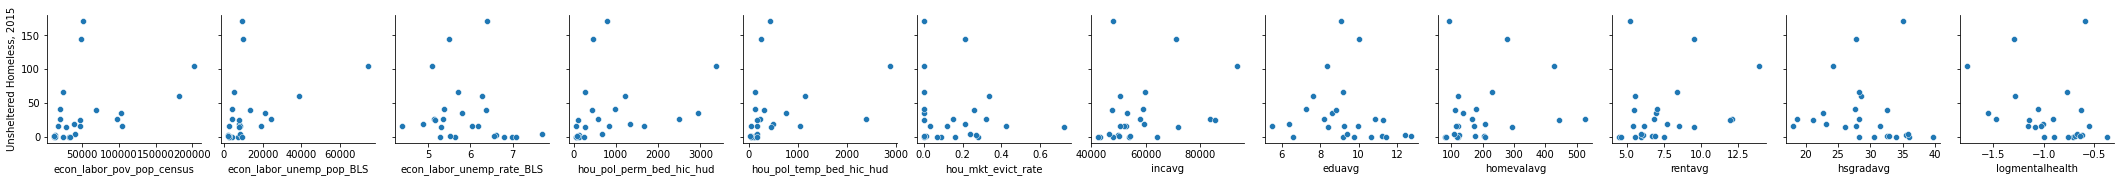

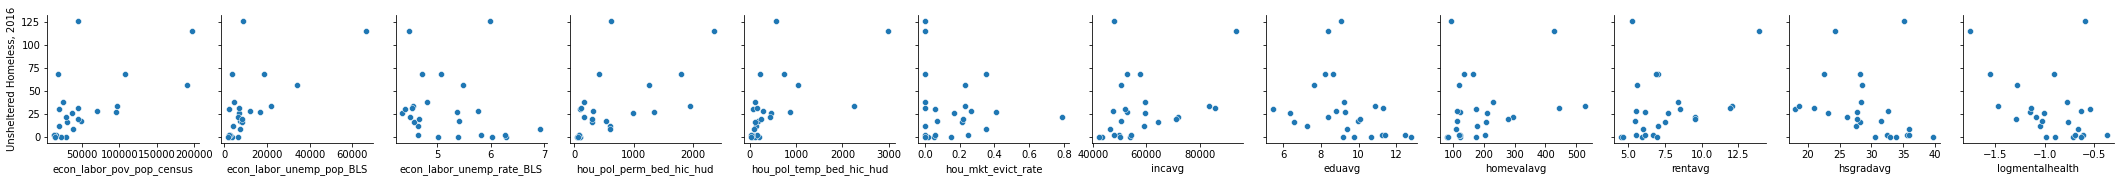

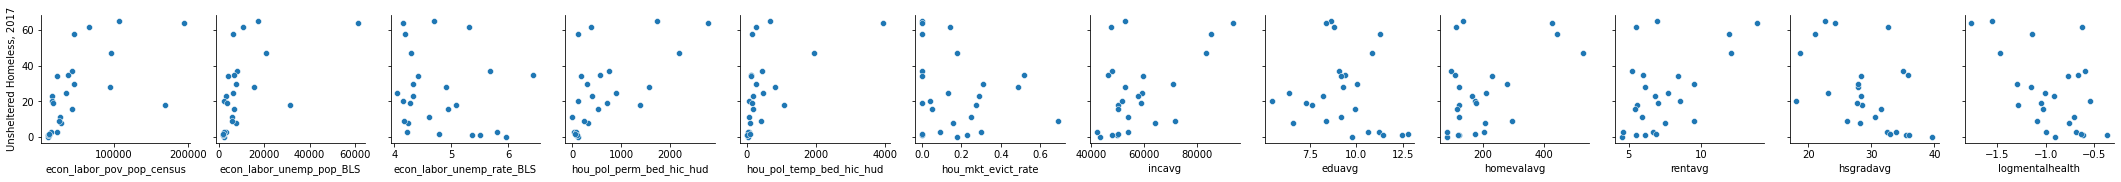

In [ ]:
NY2010plots = sns.pairplot(data = merged2010NY, y_vars = ['Unsheltered Homeless, 2010'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
NY2011plots = sns.pairplot(data = merged2011NY, y_vars = ['Unsheltered Homeless, 2011'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
NY2012plots = sns.pairplot(data = merged2012NY, y_vars = ['Unsheltered Homeless, 2012'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
NY2013plots = sns.pairplot(data = merged2013NY, y_vars = ['Unsheltered Homeless, 2013'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
NY2014plots = sns.pairplot(data = merged2014NY, y_vars = ['Unsheltered Homeless, 2014'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
NY2015plots = sns.pairplot(data = merged2015NY, y_vars = ['Unsheltered Homeless, 2015'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
NY2016plots = sns.pairplot(data = merged2016NY, y_vars = ['Unsheltered Homeless, 2016'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
NY2017plots = sns.pairplot(data = merged2017NY, y_vars = ['Unsheltered Homeless, 2017'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 

In [ ]:
slope, intercept, unempr2010, p, se = stats.linregress(merged2010NY['econ_labor_unemp_pop_BLS'], merged2010NY['Unsheltered Homeless, 2010'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, unempr2011, p, se = stats.linregress(merged2011NY['econ_labor_unemp_pop_BLS'], merged2011NY['Unsheltered Homeless, 2011'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, unempr2012, p, se = stats.linregress(merged2012NY['econ_labor_unemp_pop_BLS'], merged2012NY['Unsheltered Homeless, 2012'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, unempr2013, p, se = stats.linregress(merged2013NY['econ_labor_unemp_pop_BLS'], merged2013NY['Unsheltered Homeless, 2013'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, unempr2014, p, se = stats.linregress(merged2014NY['econ_labor_unemp_pop_BLS'], merged2014NY['Unsheltered Homeless, 2014'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, unempr2015, p, se = stats.linregress(merged2015NY['econ_labor_unemp_pop_BLS'], merged2015NY['Unsheltered Homeless, 2015'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, unempr2016, p, se = stats.linregress(merged2016NY['econ_labor_unemp_pop_BLS'], merged2016NY['Unsheltered Homeless, 2016'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, unempr2017, p, se = stats.linregress(merged2017NY['econ_labor_unemp_pop_BLS'], merged2017NY['Unsheltered Homeless, 2017'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the unemployed pop from 2010-2017 is: " + str((unempr2010 + unempr2011 + unempr2012 + unempr2013 + unempr2014 + unempr2015 + unempr2016 + unempr2017) / 8))


slope, intercept, permbedr2010, p, se = stats.linregress(merged2010NY['hou_pol_perm_bed_hic_hud'], merged2010NY['Unsheltered Homeless, 2010'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, permbedr2011, p, se = stats.linregress(merged2011NY['hou_pol_perm_bed_hic_hud'], merged2011NY['Unsheltered Homeless, 2011'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, permbedr2012, p, se = stats.linregress(merged2012NY['hou_pol_perm_bed_hic_hud'], merged2012NY['Unsheltered Homeless, 2012'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, permbedr2013, p, se = stats.linregress(merged2013NY['hou_pol_perm_bed_hic_hud'], merged2013NY['Unsheltered Homeless, 2013'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, permbedr2014, p, se = stats.linregress(merged2014NY['hou_pol_perm_bed_hic_hud'], merged2014NY['Unsheltered Homeless, 2014'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, permbedr2015, p, se = stats.linregress(merged2015NY['hou_pol_perm_bed_hic_hud'], merged2015NY['Unsheltered Homeless, 2015'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, permbedr2016, p, se = stats.linregress(merged2016NY['hou_pol_perm_bed_hic_hud'], merged2016NY['Unsheltered Homeless, 2016'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, permbedr2017, p, se = stats.linregress(merged2017NY['hou_pol_perm_bed_hic_hud'], merged2017NY['Unsheltered Homeless, 2017'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the permanent shelter beds from 2010-2017 is: " + str((permbedr2010 + permbedr2011 + permbedr2012 + permbedr2013 + permbedr2014 + permbedr2015 + permbedr2016 + permbedr2017) / 8))

slope, intercept, tempbedr2010, p, se = stats.linregress(merged2010NY['hou_pol_temp_bed_hic_hud'], merged2010NY['Unsheltered Homeless, 2010'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, tempbedr2011, p, se = stats.linregress(merged2011NY['hou_pol_temp_bed_hic_hud'], merged2011NY['Unsheltered Homeless, 2011'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, tempbedr2012, p, se = stats.linregress(merged2012NY['hou_pol_temp_bed_hic_hud'], merged2012NY['Unsheltered Homeless, 2012'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, tempbedr2013, p, se = stats.linregress(merged2013NY['hou_pol_temp_bed_hic_hud'], merged2013NY['Unsheltered Homeless, 2013'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, tempbedr2014, p, se = stats.linregress(merged2014NY['hou_pol_temp_bed_hic_hud'], merged2014NY['Unsheltered Homeless, 2014'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, tempbedr2015, p, se = stats.linregress(merged2015NY['hou_pol_temp_bed_hic_hud'], merged2015NY['Unsheltered Homeless, 2015'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, tempbedr2016, p, se = stats.linregress(merged2016NY['hou_pol_temp_bed_hic_hud'], merged2016NY['Unsheltered Homeless, 2016'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, tempbedr2017, p, se = stats.linregress(merged2017NY['hou_pol_temp_bed_hic_hud'], merged2017NY['Unsheltered Homeless, 2017'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the temporary shelter beds from 2010-2017 is: " + str((tempbedr2010 + tempbedr2011 + tempbedr2012 + tempbedr2013 + tempbedr2014 + tempbedr2015 + tempbedr2016 + tempbedr2017) / 8))

slope, intercept, incr2010, p, se = stats.linregress(merged2010NY['incavg'], merged2010NY['Unsheltered Homeless, 2010'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, incr2011, p, se = stats.linregress(merged2011NY['incavg'], merged2011NY['Unsheltered Homeless, 2011'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, incr2012, p, se = stats.linregress(merged2012NY['incavg'], merged2012NY['Unsheltered Homeless, 2012'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, incr2013, p, se = stats.linregress(merged2013NY['incavg'], merged2013NY['Unsheltered Homeless, 2013'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, incr2014, p, se = stats.linregress(merged2014NY['incavg'], merged2014NY['Unsheltered Homeless, 2014'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, incr2015, p, se = stats.linregress(merged2015NY['incavg'], merged2015NY['Unsheltered Homeless, 2015'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, incr2016, p, se = stats.linregress(merged2016NY['incavg'], merged2016NY['Unsheltered Homeless, 2016'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, incr2017, p, se = stats.linregress(merged2017NY['incavg'], merged2017NY['Unsheltered Homeless, 2017'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the income from 2010-2017 is: " + str((incr2010 + incr2011 + incr2012 + incr2013 + incr2014 + incr2015 + incr2016 + incr2017) / 8))


slope, intercept, valr2010, p, se = stats.linregress(merged2010NY['homevalavg'], merged2010NY['Unsheltered Homeless, 2010'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, valr2011, p, se = stats.linregress(merged2011NY['homevalavg'], merged2011NY['Unsheltered Homeless, 2011'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, valr2012, p, se = stats.linregress(merged2012NY['homevalavg'], merged2012NY['Unsheltered Homeless, 2012'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, valr2013, p, se = stats.linregress(merged2013NY['homevalavg'], merged2013NY['Unsheltered Homeless, 2013'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, valr2014, p, se = stats.linregress(merged2014NY['homevalavg'], merged2014NY['Unsheltered Homeless, 2014'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, valr2015, p, se = stats.linregress(merged2015NY['homevalavg'], merged2015NY['Unsheltered Homeless, 2015'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, valr2016, p, se = stats.linregress(merged2016NY['homevalavg'], merged2016NY['Unsheltered Homeless, 2016'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, valr2017, p, se = stats.linregress(merged2017NY['homevalavg'], merged2017NY['Unsheltered Homeless, 2017'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the house values 2010-2017 is: " + str((valr2010 + valr2011 + valr2012 + valr2013 + valr2014 + valr2015 + valr2016 + valr2017) / 8))

slope, intercept, rentr2010, p, se = stats.linregress(merged2010NY['rentavg'], merged2010NY['Unsheltered Homeless, 2010'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, rentr2011, p, se = stats.linregress(merged2011NY['rentavg'], merged2011NY['Unsheltered Homeless, 2011'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, rentr2012, p, se = stats.linregress(merged2012NY['rentavg'], merged2012NY['Unsheltered Homeless, 2012'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, rentr2013, p, se = stats.linregress(merged2013NY['rentavg'], merged2013NY['Unsheltered Homeless, 2013'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, rentr2014, p, se = stats.linregress(merged2014NY['rentavg'], merged2014NY['Unsheltered Homeless, 2014'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, rentr2015, p, se = stats.linregress(merged2015NY['rentavg'], merged2015NY['Unsheltered Homeless, 2015'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, rentr2016, p, se = stats.linregress(merged2016NY['rentavg'], merged2016NY['Unsheltered Homeless, 2016'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, rentr2017, p, se = stats.linregress(merged2017NY['rentavg'], merged2017NY['Unsheltered Homeless, 2017'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the rent costs 2010-2017 is: " + str((rentr2010 + rentr2011 + rentr2012 + rentr2013 + rentr2014 + rentr2015 + rentr2016 + rentr2017) / 8))

slope, intercept, hsgradr2010, p, se = stats.linregress(merged2010NY['hsgradavg'], merged2010NY['Unsheltered Homeless, 2010'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, hsgradr2011, p, se = stats.linregress(merged2011NY['hsgradavg'], merged2011NY['Unsheltered Homeless, 2011'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, hsgradr2012, p, se = stats.linregress(merged2012NY['hsgradavg'], merged2012NY['Unsheltered Homeless, 2012'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, hsgradr2013, p, se = stats.linregress(merged2013NY['hsgradavg'], merged2013NY['Unsheltered Homeless, 2013'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, hsgradr2014, p, se = stats.linregress(merged2014NY['hsgradavg'], merged2014NY['Unsheltered Homeless, 2014'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, hsgradr2015, p, se = stats.linregress(merged2015NY['hsgradavg'], merged2015NY['Unsheltered Homeless, 2015'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, hsgradr2016, p, se = stats.linregress(merged2016NY['hsgradavg'], merged2016NY['Unsheltered Homeless, 2016'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, hsgradr2017, p, se = stats.linregress(merged2017NY['hsgradavg'], merged2017NY['Unsheltered Homeless, 2017'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the high school graduate population costs 2010-2017 is: " + str((hsgradr2010 + hsgradr2011 + hsgradr2012 + hsgradr2013 + hsgradr2014 + hsgradr2015 + hsgradr2016 + hsgradr2017) / 8))

slope, intercept, mentalr2010, p, se = stats.linregress(merged2010NY['logmentalhealth'], merged2010NY['Unsheltered Homeless, 2010'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, mentalr2011, p, se = stats.linregress(merged2011NY['logmentalhealth'], merged2011NY['Unsheltered Homeless, 2011'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, mentalr2012, p, se = stats.linregress(merged2012NY['logmentalhealth'], merged2012NY['Unsheltered Homeless, 2012'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, mentalr2013, p, se = stats.linregress(merged2013NY['logmentalhealth'], merged2013NY['Unsheltered Homeless, 2013'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, mentalr2014, p, se = stats.linregress(merged2014NY['logmentalhealth'], merged2014NY['Unsheltered Homeless, 2014'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, mentalr2015, p, se = stats.linregress(merged2015NY['logmentalhealth'], merged2015NY['Unsheltered Homeless, 2015'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, mentalr2016, p, se = stats.linregress(merged2016NY['logmentalhealth'], merged2016NY['Unsheltered Homeless, 2016'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, mentalr2017, p, se = stats.linregress(merged2017NY['logmentalhealth'], merged2017NY['Unsheltered Homeless, 2017'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the log of mental health providers from 2010-2017 is: " + str((mentalr2010 + mentalr2011 + mentalr2012 + mentalr2013 + mentalr2014 + mentalr2015 + mentalr2016 + mentalr2017) / 8))

slope, intercept, povr2010, p, se = stats.linregress(merged2010NY['econ_labor_pov_pop_census'], merged2010NY['Unsheltered Homeless, 2010'])
#print("Total Unemployed Pop 2010: " + str(unempr2010))
slope, intercept, povr2011, p, se = stats.linregress(merged2011NY['econ_labor_pov_pop_census'], merged2011NY['Unsheltered Homeless, 2011'])
#print("Total Unemployed Pop 2011: " + str(unempr2011))
slope, intercept, povr2012, p, se = stats.linregress(merged2012NY['econ_labor_pov_pop_census'], merged2012NY['Unsheltered Homeless, 2012'])
#print("Total Unemployed Pop 2012: " + str(unempr2012))
slope, intercept, povr2013, p, se = stats.linregress(merged2013NY['econ_labor_pov_pop_census'], merged2013NY['Unsheltered Homeless, 2013'])
#print("Total Unemployed Pop 2013: " + str(unempr2013))
slope, intercept, povr2014, p, se = stats.linregress(merged2014NY['econ_labor_pov_pop_census'], merged2014NY['Unsheltered Homeless, 2014'])
#print("Total Unemployed Pop 2014: " + str(unempr2014))
slope, intercept, povr2015, p, se = stats.linregress(merged2015NY['econ_labor_pov_pop_census'], merged2015NY['Unsheltered Homeless, 2015'])
#print("Total Unemployed Pop 2015: " + str(unempr2015))
slope, intercept, povr2016, p, se = stats.linregress(merged2016NY['econ_labor_pov_pop_census'], merged2016NY['Unsheltered Homeless, 2016'])
#print("Total Unemployed Pop 2016: " + str(unempr2016))
slope, intercept, povr2017, p, se = stats.linregress(merged2017NY['econ_labor_pov_pop_census'], merged2017NY['Unsheltered Homeless, 2017'])
#print("Total Unemployed Pop 2017: " + str(unempr2017))
print("Average r-value of the population in poverty from 2010-2017 is: " + str((povr2010 + povr2011 + povr2012 + povr2013 + povr2014 + povr2015 + povr2016 + povr2017) / 8))

Average r-value of the unemployed pop from 2010-2017 is: 0.47375508153254586
Average r-value of the permanent shelter beds from 2010-2017 is: 0.353978958273196
Average r-value of the temporary shelter beds from 2010-2017 is: 0.337107824730021
Average r-value of the income from 2010-2017 is: 0.2843178214870121
Average r-value of the house values 2010-2017 is: 0.20143881158924024
Average r-value of the rent costs 2010-2017 is: 0.26095734629481937
Average r-value of the high school graduate population costs 2010-2017 is: -0.22748346700882302
Average r-value of the log of mental health providers from 2010-2017 is: -0.40466852229859607
Average r-value of the population in poverty from 2010-2017 is: 0.47174352343609927


In [ ]:
loc2010TX = ((merged2010['state_abr'] == 'TX') & (merged2010['Unsheltered Homeless, 2010'] < 8000)) #   & (merged2010['econ_labor_unemp_pop_BLS'] < 75000)& (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2010TX = merged2010[loc2010TX]
loc2011TX = ((merged2011['state_abr'] == 'TX')& (merged2011['Unsheltered Homeless, 2011'] < 8000)) #  & (merged2010['Unsheltered Homeless, 2010'] < 2000) & (merged2010['econ_labor_unemp_pop_BLS'] < 75000)& (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2011TX = merged2011[loc2011TX]
loc2012TX = ((merged2012['state_abr'] == 'TX')& (merged2012['Unsheltered Homeless, 2012'] < 8000)) #  & (merged2010['Unsheltered Homeless, 2010'] < 2000) & (merged2010['econ_labor_unemp_pop_BLS'] < 75000)& (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2012TX = merged2012[loc2012TX]
loc2013TX = ((merged2013['state_abr'] == 'TX')& (merged2013['Unsheltered Homeless, 2013'] < 8000)) #  & (merged2010['Unsheltered Homeless, 2010'] < 2000) & (merged2010['econ_labor_unemp_pop_BLS'] < 75000)& (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2013TX = merged2013[loc2013TX]
loc2014TX = ((merged2014['state_abr'] == 'TX')& (merged2014['Unsheltered Homeless, 2014'] < 8000)) #  & (merged2010['Unsheltered Homeless, 2010'] < 2000) & (merged2010['econ_labor_unemp_pop_BLS'] < 75000)& (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2014TX = merged2014[loc2014TX]
loc2015TX = ((merged2015['state_abr'] == 'TX')& (merged2015['Unsheltered Homeless, 2015'] < 8000)) #  & (merged2010['Unsheltered Homeless, 2010'] < 2000) & (merged2010['econ_labor_unemp_pop_BLS'] < 75000)& (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2015TX = merged2015[loc2015TX]
loc2016TX = ((merged2016['state_abr'] == 'TX')& (merged2016['Unsheltered Homeless, 2016'] < 8000)) #  & (merged2010['Unsheltered Homeless, 2010'] < 2000) & (merged2010['econ_labor_unemp_pop_BLS'] < 75000)& (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2016TX = merged2016[loc2016TX]
loc2017TX = ((merged2017['state_abr'] == 'TX')& (merged2017['Unsheltered Homeless, 2017'] < 8000)) #  & (merged2010['Unsheltered Homeless, 2010'] < 2000) & (merged2010['econ_labor_unemp_pop_BLS'] < 75000)& (merged2010['homevalavg'] < 800) & (merged2010['dem_health_mhlth_chr_share_2017'] < 3)
merged2017TX = merged2017[loc2017TX]


TX2010plots = sns.pairplot(data = merged2010TX, y_vars = ['Unsheltered Homeless, 2010'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
TX2011plots = sns.pairplot(data = merged2011TX, y_vars = ['Unsheltered Homeless, 2011'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
TX2012plots = sns.pairplot(data = merged2012TX, y_vars = ['Unsheltered Homeless, 2012'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
TX2013plots = sns.pairplot(data = merged2013TX, y_vars = ['Unsheltered Homeless, 2013'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
TX2014plots = sns.pairplot(data = merged2014TX, y_vars = ['Unsheltered Homeless, 2014'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
TX2015plots = sns.pairplot(data = merged2015TX, y_vars = ['Unsheltered Homeless, 2015'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
TX2016plots = sns.pairplot(data = merged2016TX, y_vars = ['Unsheltered Homeless, 2016'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 
TX2017plots = sns.pairplot(data = merged2017TX, y_vars = ['Unsheltered Homeless, 2017'], x_vars = ['econ_labor_pov_pop_census', 'econ_labor_unemp_pop_BLS', 'econ_labor_unemp_rate_BLS', 'hou_pol_perm_bed_hic_hud', 'hou_pol_temp_bed_hic_hud', 'hou_mkt_evict_rate', 'incavg', 'eduavg', 'homevalavg', 'rentavg', 'hsgradavg', 'logmentalhealth']) 